# Lactancia materna, tipo de parto y enfermedades autoinmunes en adultos que acuden a consultas en una clínica privada
(R version)

## Objetivo general
Determinar la frecuencia de lactancia materna, el tipo de parto y de enfermedades autoinmunes en adultos de ambos sexos que asisten a consultas médicas y nutricionales en la Clínica Masquelier Medicina Integrativa durante el mes de enero a setiembre de 2020.

## Objetivos específicos
1. Caracterizar a la muestra según datos demográficos
2. Identificar los tipos de partos
3. Describir el tipo de alimentación recibida durante la infancia
4. Determinar el tipo de enfermedades autoinmunes adquiridas
5. Explorar relación entre el tipo de parto, la lactancia materna y las enfermedades autoinmunes adquiridas

In [1]:
options(warn = -1)

# Librerías
suppressPackageStartupMessages({
    library(tidyverse)
    library(rstatix)
    library(ggstatsplot)
    library(readxl)
    library(janitor)
})

In [2]:
source("plots.R")

In [3]:
# Importando datos
df = read_csv("MJNAZER_DF.csv", col_types = cols())
df <- clean_names(df) %>%
    select(-c(x1, sujeto, tiempo_de_lactancia, otras_patologias_asociadas, obs, consumo_de_atb, sintomas_gastricos, sintomas_sist_inmunologico, sobrepeso_u_obesidad)) %>% 
    rename(tiempo_de_lactancia = tiempo_de_lactancia_1)

In [4]:
# Características de las variables
glimpse(df)

Rows: 401
Columns: 16
$ unnamed_0           <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,~
$ fecha_de_nac        <chr> "1960-01-28 00:00:00", "1977-08-27 00:00:00", "197~
$ edad                <dbl> 60, 43, 44, 60, 42, 48, 65, 30, 51, 39, 24, 37, 37~
$ sexo                <chr> "Femenino", "Femenino", "Femenino", "Femenino", "M~
$ via_de_nacimiento   <chr> "Vaginal", "Cesárea", "Vaginal", "Vaginal", "Cesár~
$ lact_si             <chr> "SI", "SI", "SI", "SI", "SI", "SI", "SI", "SI", "S~
$ lact_no             <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, "NO", NA, NA, ~
$ tiempo_de_lactancia <chr> "Más de 6 meses", "6 meses o menos", "6 meses o me~
$ dx_enf_autoinm      <chr> "Sí", "Sí", "Sí", "Sí", "Sí", "Sí", "Sí", "No", "S~
$ hipot               <chr> "Hashimoto", "Hashimoto", "Ninguna", "Hashimoto", ~
$ celiaquia           <chr> "No", "No", "Sí", "No", "No", "No", "Sí", "No", "N~
$ artritis            <chr> "No", "No", "No", "No", "No", "No", "No", "No", "N~
$ rinitis_alergica

## Análisis estadístico

La asociación entre vía de nacimiento, tiempo de lactancia y presencia de enfermedades autoinmumes (incluyendo patología tiroidea, tiroiditis de Hashimoto, enfermedad celíaca y artritis reumatoide) fue evaluada usando la prueba del $\chi^2$. Las diferencias se consideraron estadísticamente significativas cuando $P<0.05$ para 2 colas de distribución. Los datos fueron analizados en R versión 4.0.3.

## Resultados

### Objetivo específico núm. 1: Caracterizar a la muestra según datos demográficos

#### Distribución según edad

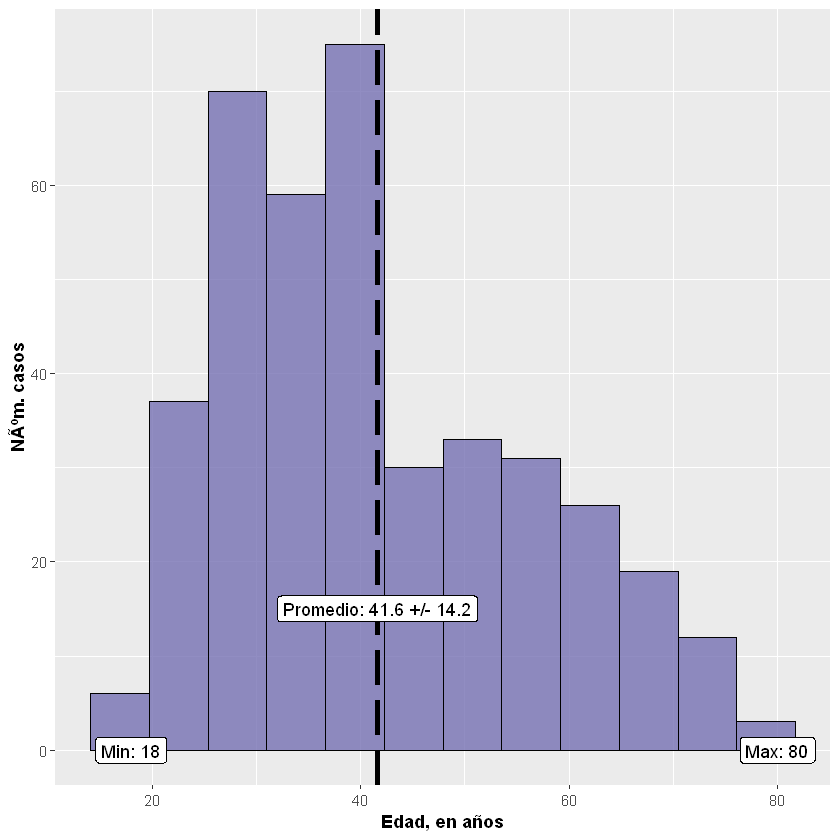

In [5]:
df %>% plot_histogram(edad, "Edad, en años")

#### Distribución según sexo

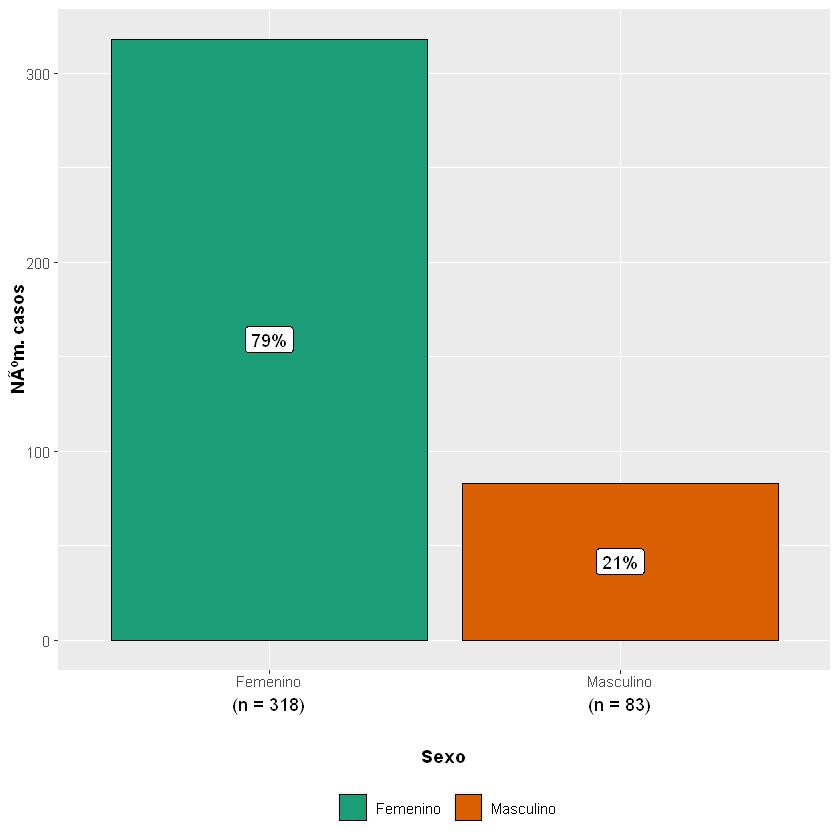

In [6]:
df %>% plot_bar(sexo, "Sexo")

### Objetivo específico núm. 2: Identificar los tipos de partos

#### Distribución según vías de nacimiento

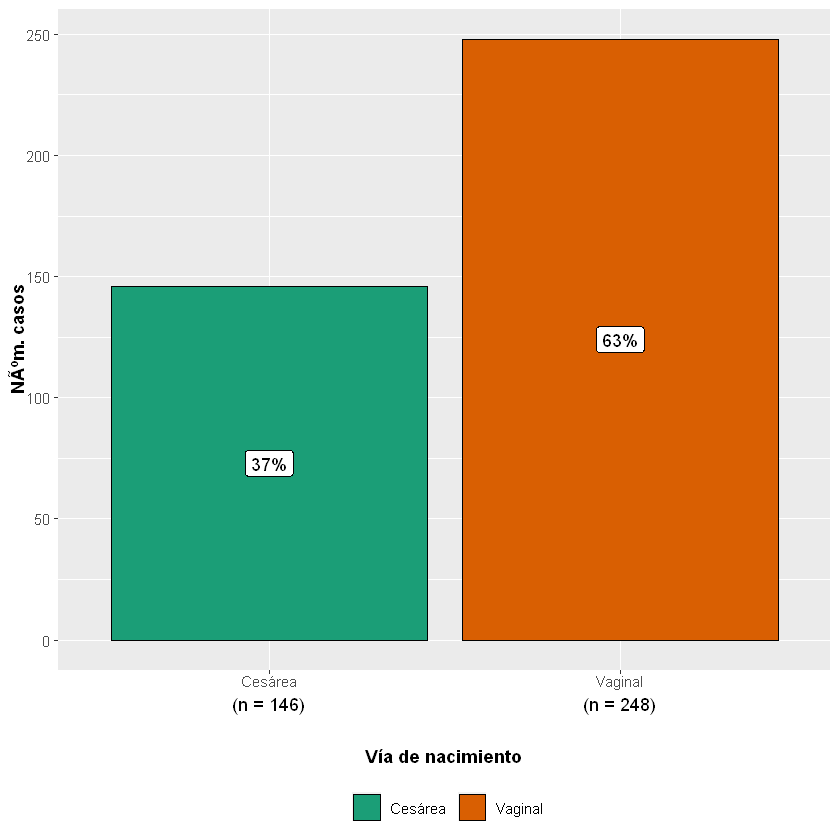

In [7]:
df %>% plot_bar(via_de_nacimiento, "Vía de nacimiento")

### Objetivo específico núm. 3: Describir el tipo de alimentación recibida durante la infancia

#### Distribución de acuerdo a la duración de la lactancia recibida

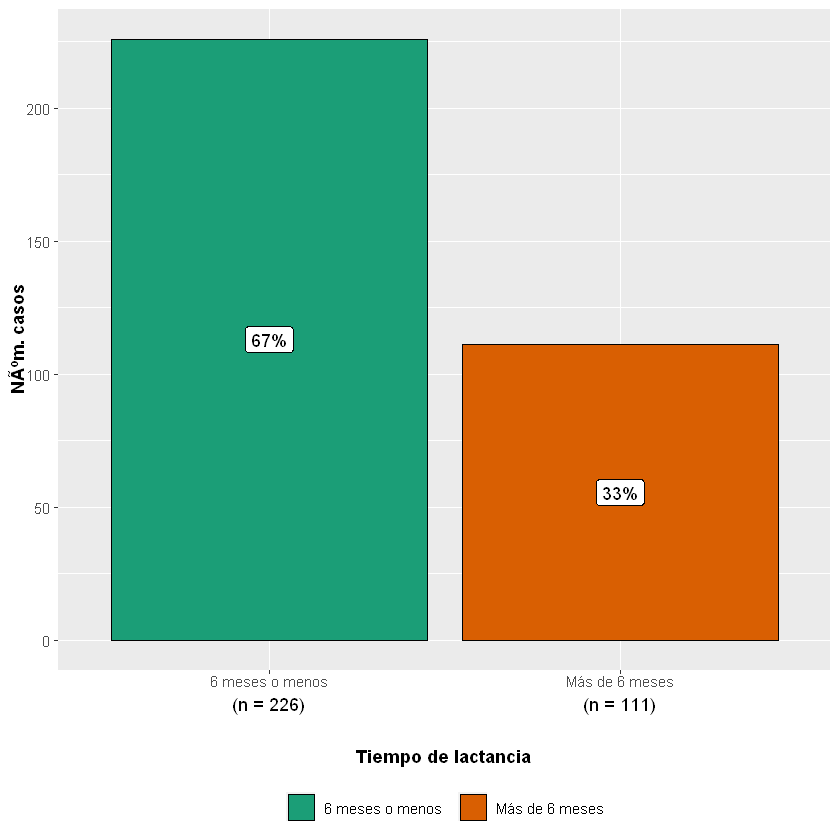

In [8]:
# Las 4 categorías originales fueron colapsadas a 2 categorías, siguiendo las instrucciones proveídas por los tutores
# Las 2 categorías finales incluyen '6 meses o menos' (no mamó + menos de 6 meses + 6 meses) y 'Más de 6 meses' (el resto)

df %>% plot_bar(tiempo_de_lactancia, "Tiempo de lactancia")

### Objetivo específico núm. 4: Determinar el tipo de enfermedades autoinmunes adquiridas

#### Enfermedades autoinmunes en general

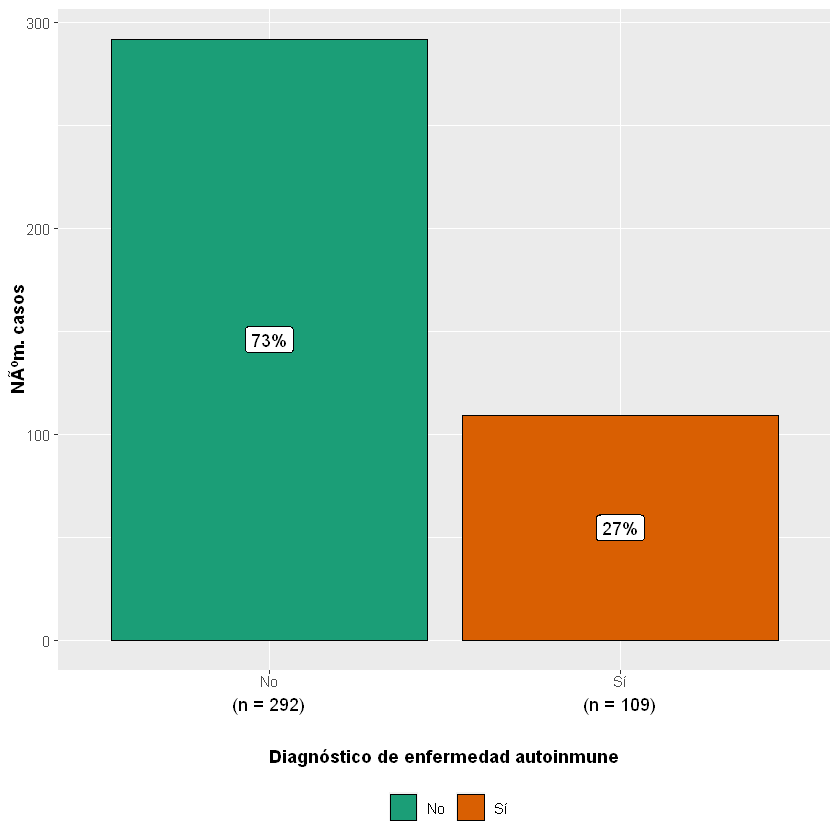

In [9]:
df %>% plot_bar(dx_enf_autoinm, "Diagnóstico de enfermedad autoinmune")

#### Enfermedad tiroidea

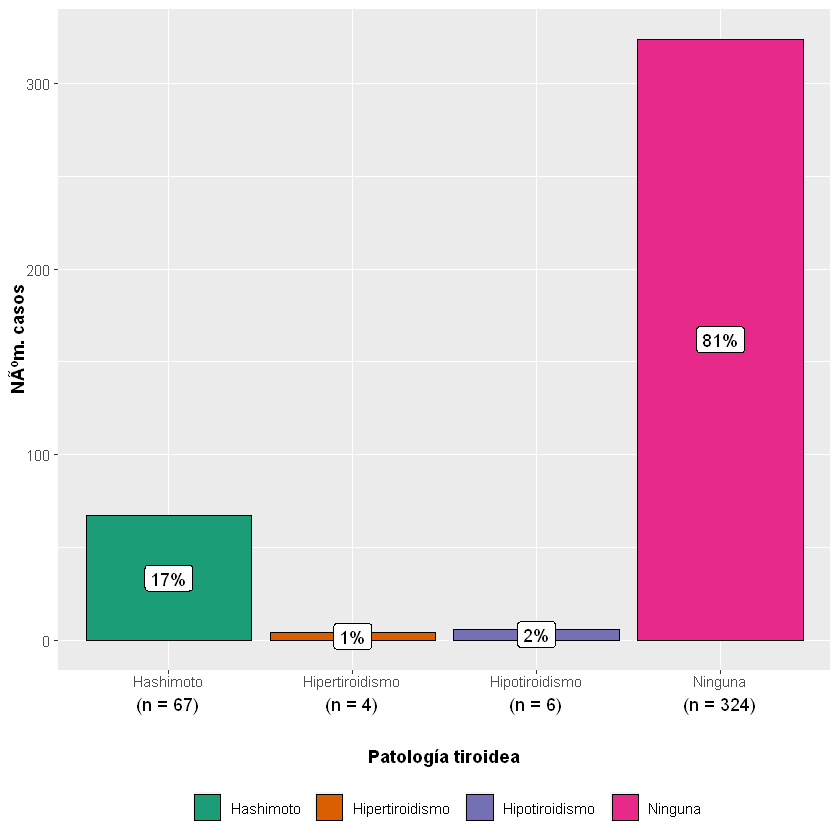

In [10]:
# Siguiendo las indicaciones dadas por los tutores, se consideraron los casos con 'HIPO' como Hashimoto, los casos 'HIPER E HIPO' e 'HIPO PQ' como hipotiroidismo, y el resto similar

df %>% plot_bar(hipot, "Patología tiroidea")

#### Enfermedad Celiaca

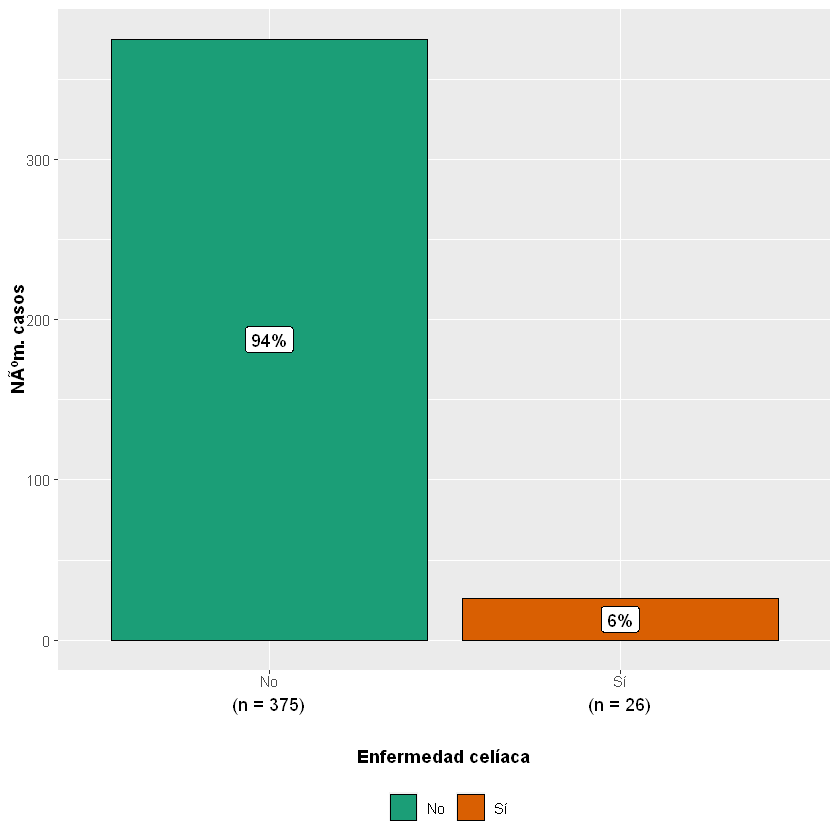

In [11]:
df %>% plot_bar(celiaquia, "Enfermedad celíaca")

#### Artritis reumatoide

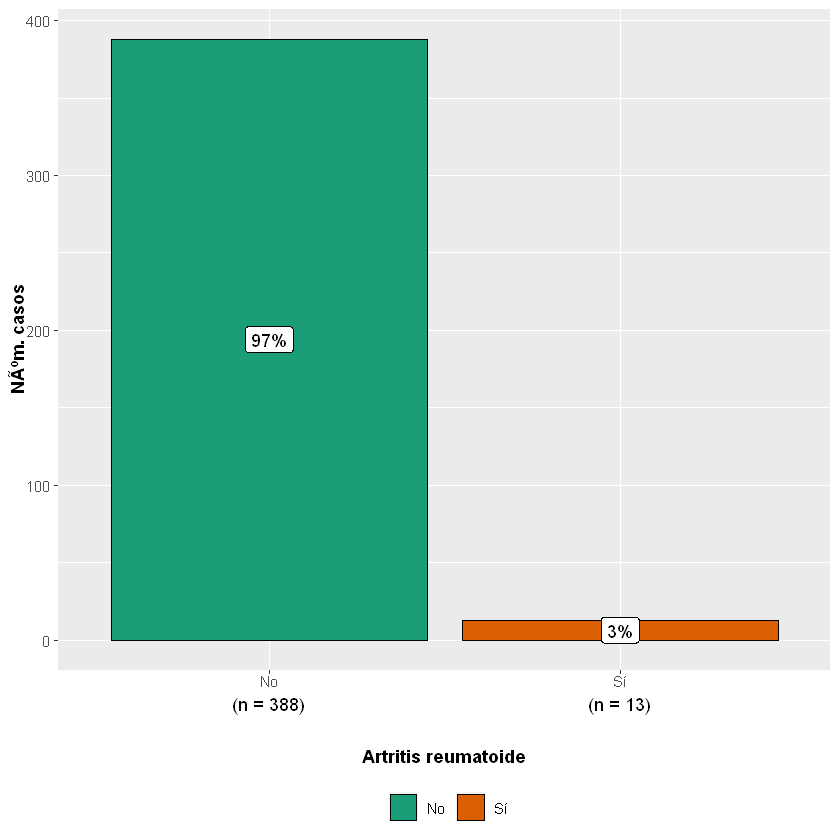

In [12]:
df %>% plot_bar(artritis, "Artritis reumatoide")

### Objetivo específico núm. 5: Explorar relación entre el tipo de parto, la lactancia materna y las enfermedades autoinmunes adquiridas

#### Tipo de parto y enfermedades autoinmunes

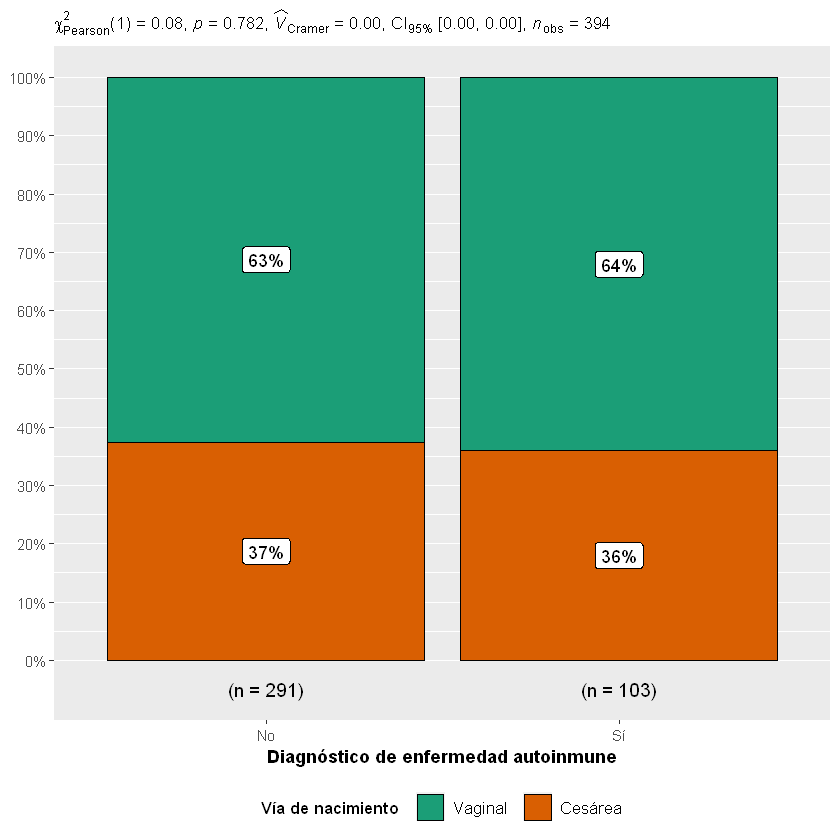

In [13]:
df %>% plot_barstats(x = dx_enf_autoinm, y = via_de_nacimiento, xlab = "Diagnóstico de enfermedad autoinmune", legend = "Vía de nacimiento")

#### Tipo de parto y patología tiroidea

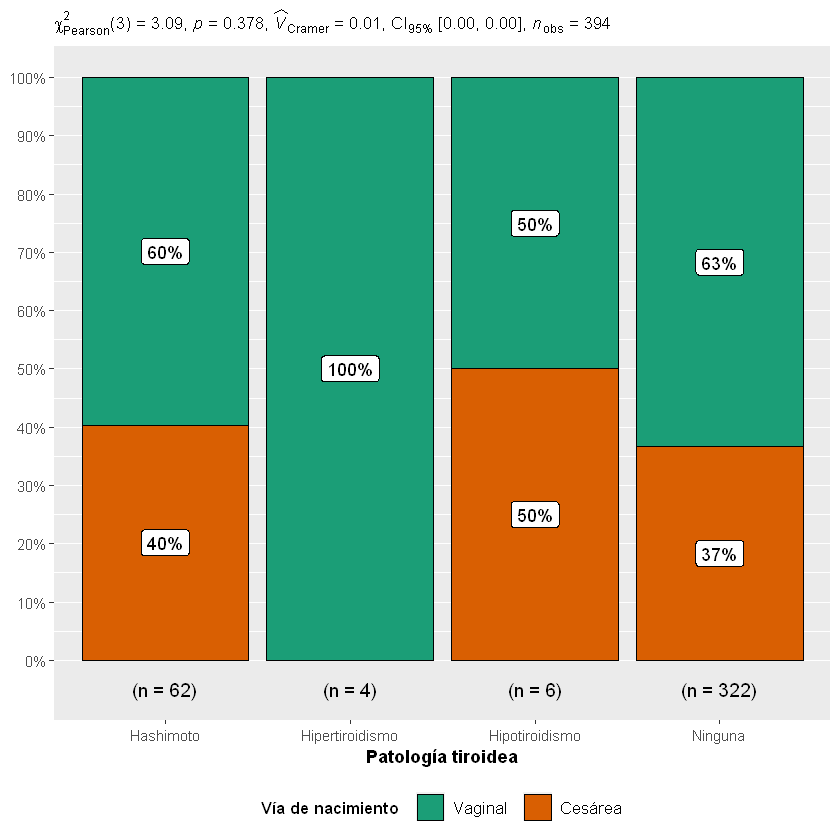

In [14]:
df %>% plot_barstats(x = hipot, y = via_de_nacimiento, xlab = "Patología tiroidea", legend = "Vía de nacimiento")

#### Tipo de parto y enfermedad celíaca

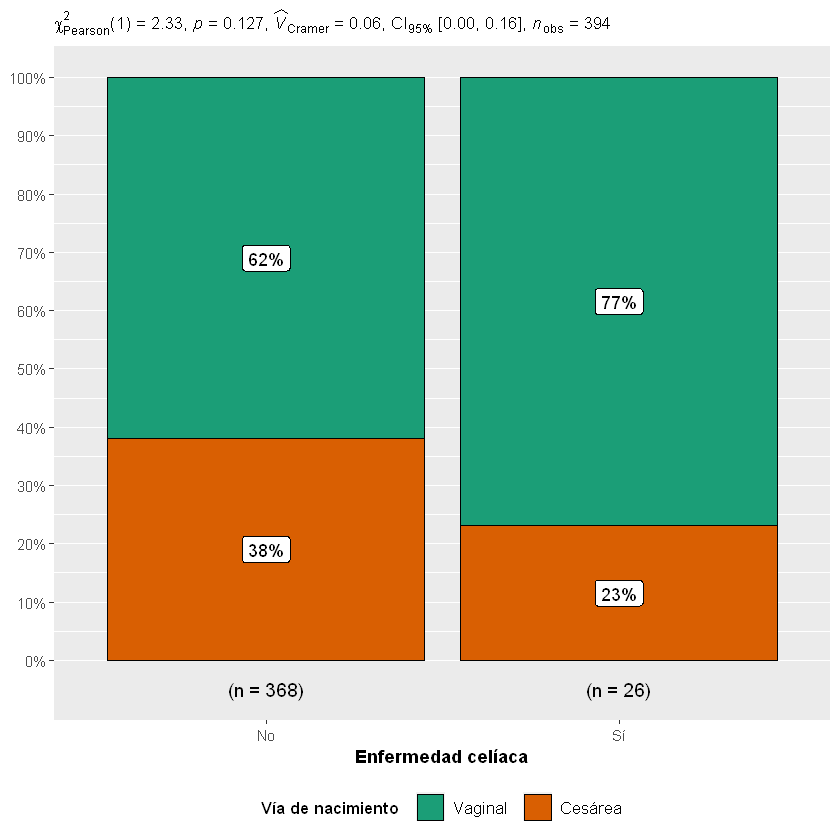

In [15]:
df %>% plot_barstats(x = celiaquia, y = via_de_nacimiento, xlab = "Enfermedad celíaca", legend = "Vía de nacimiento")

#### Tipo de parto y artritis reumatoide

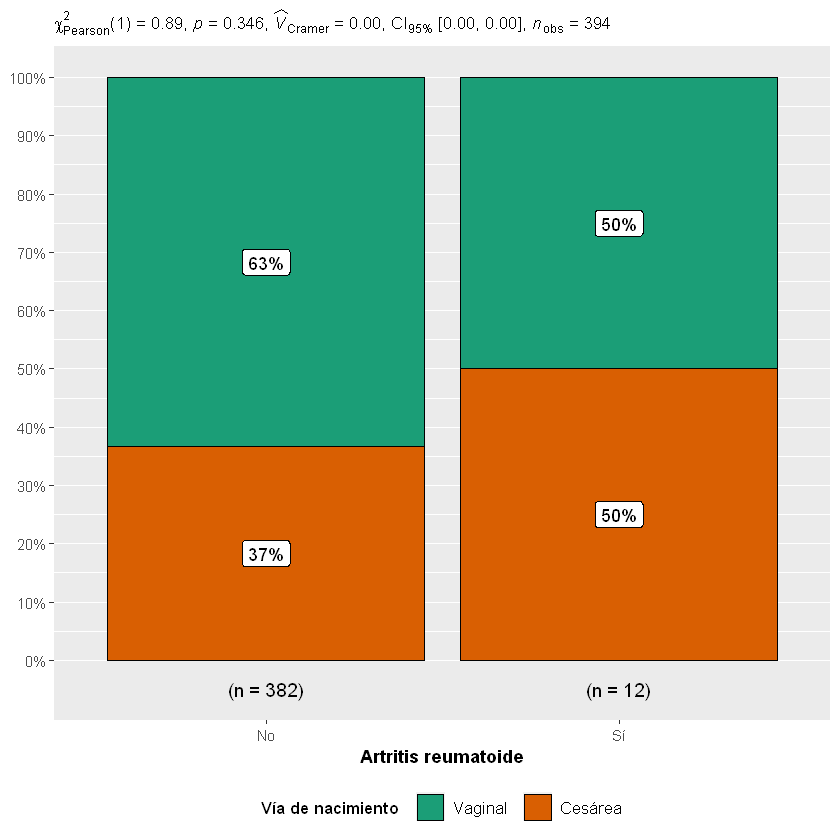

In [16]:
df %>% plot_barstats(x = artritis, y = via_de_nacimiento, xlab = "Artritis reumatoide", legend = "Vía de nacimiento")

#### Tiempo de lactancia y enfermedades autoinmunes

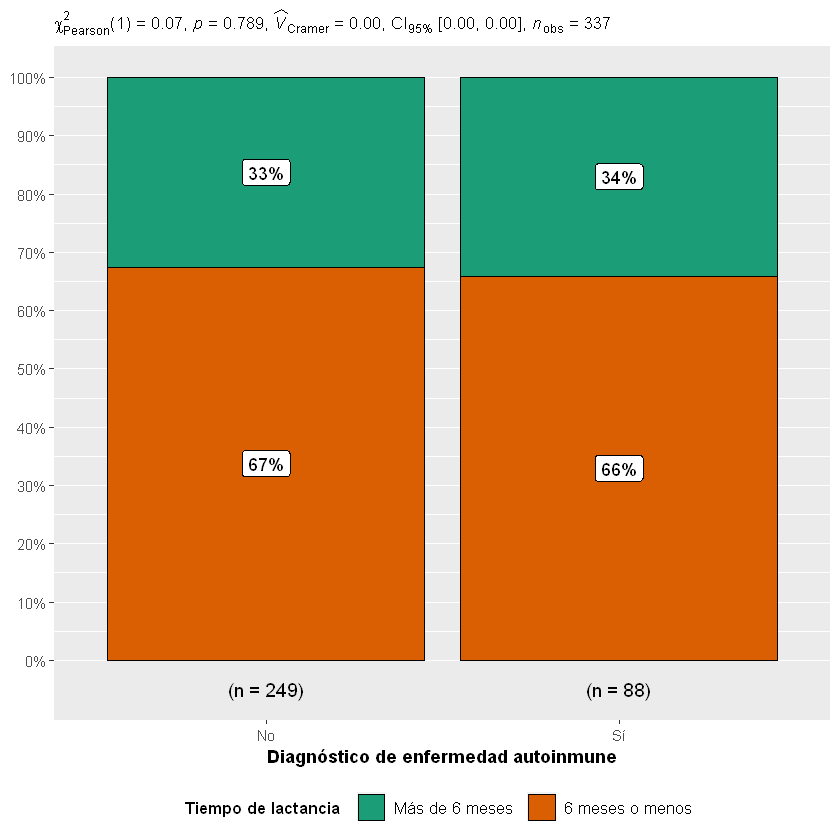

In [17]:
df %>% plot_barstats(x = dx_enf_autoinm, y = tiempo_de_lactancia, xlab = "Diagnóstico de enfermedad autoinmune", legend = "Tiempo de lactancia")

#### Tiempo de lactancia y patología tiroidea

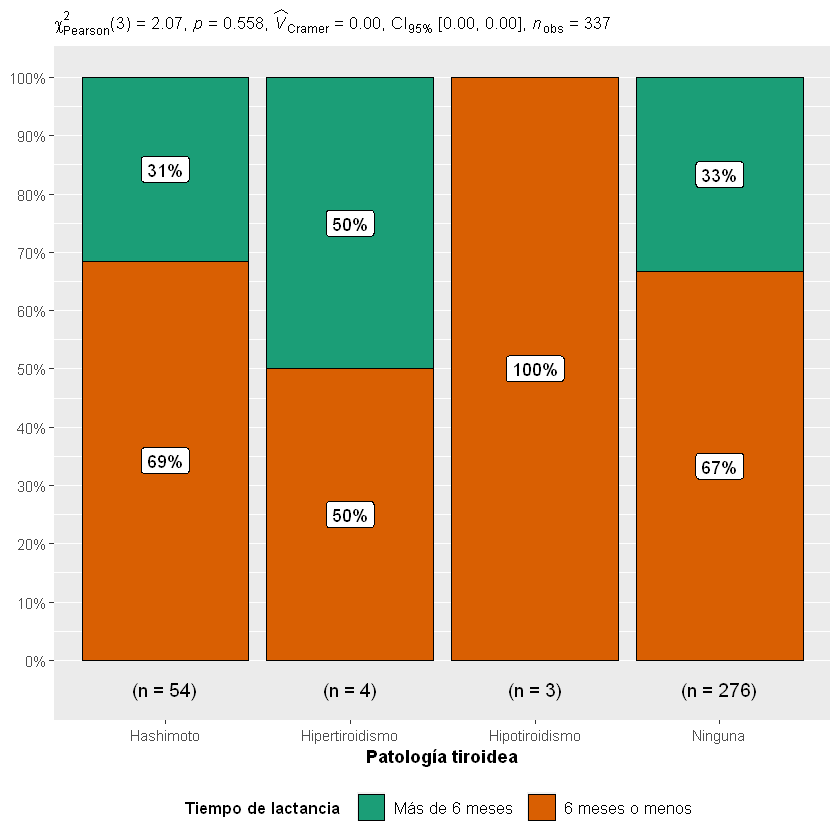

In [18]:
df %>%
plot_barstats(
    x = hipot, y = tiempo_de_lactancia,
    xlab = "Patología tiroidea", legend = "Tiempo de lactancia"
)

#### Tiempo de lactancia y enfermedad celíaca

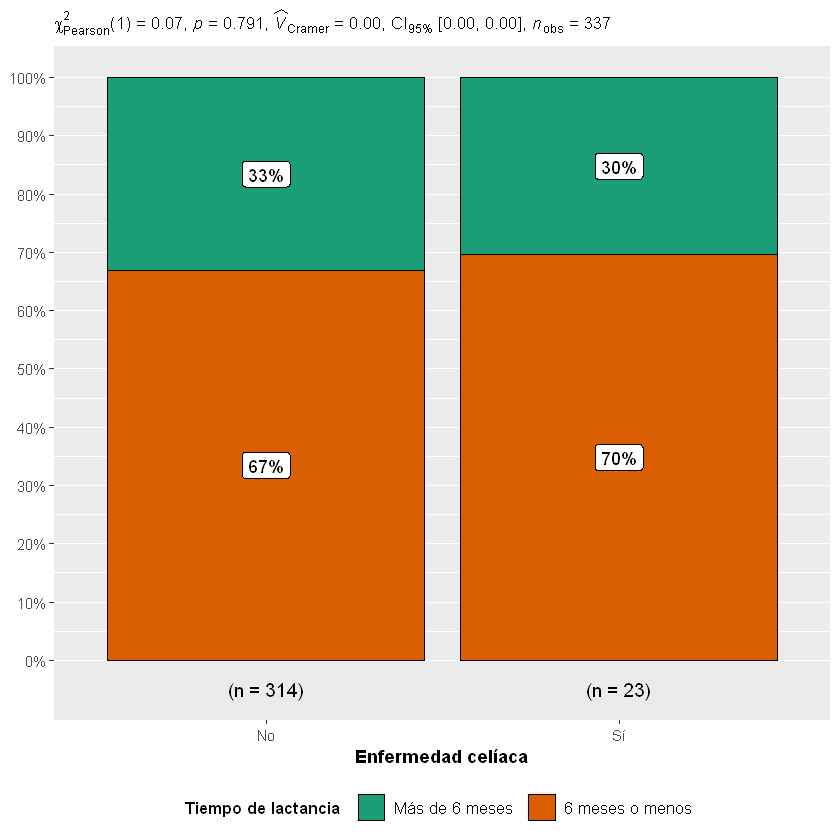

In [19]:
df %>%
plot_barstats(
    x = celiaquia, y = tiempo_de_lactancia,
    xlab = "Enfermedad celíaca", legend = "Tiempo de lactancia"
)

#### Tiempo de lactancia y artritis reumatoide

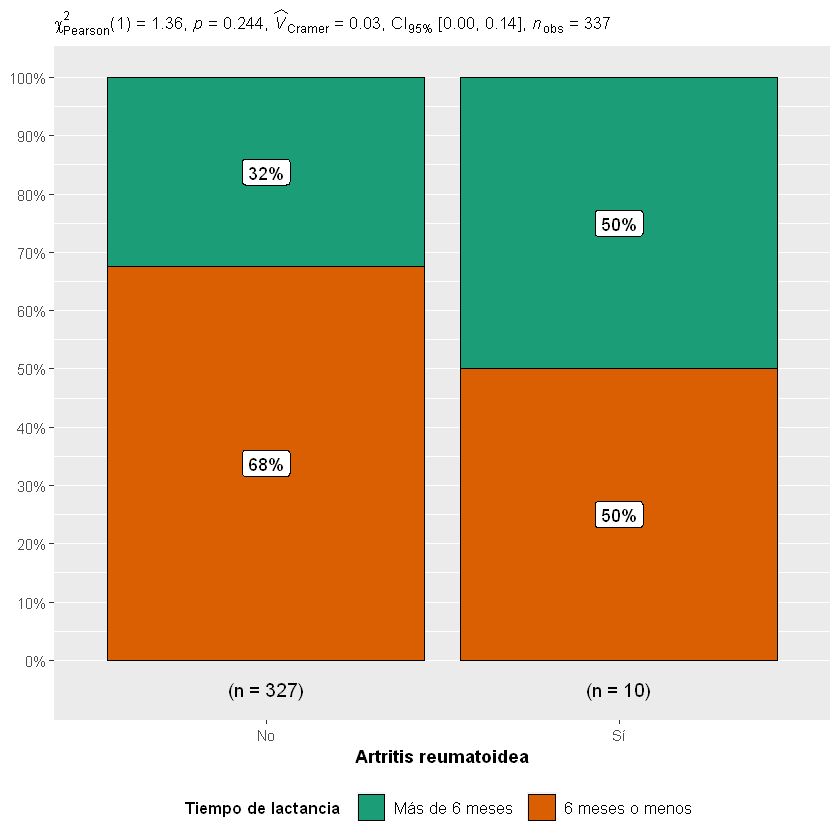

In [20]:
df %>%
plot_barstats(
    x = artritis, y = tiempo_de_lactancia,
    xlab = "Artritis reumatoidea", legend = "Tiempo de lactancia"
)

#### Tipo de parto + tiempo de lactancia

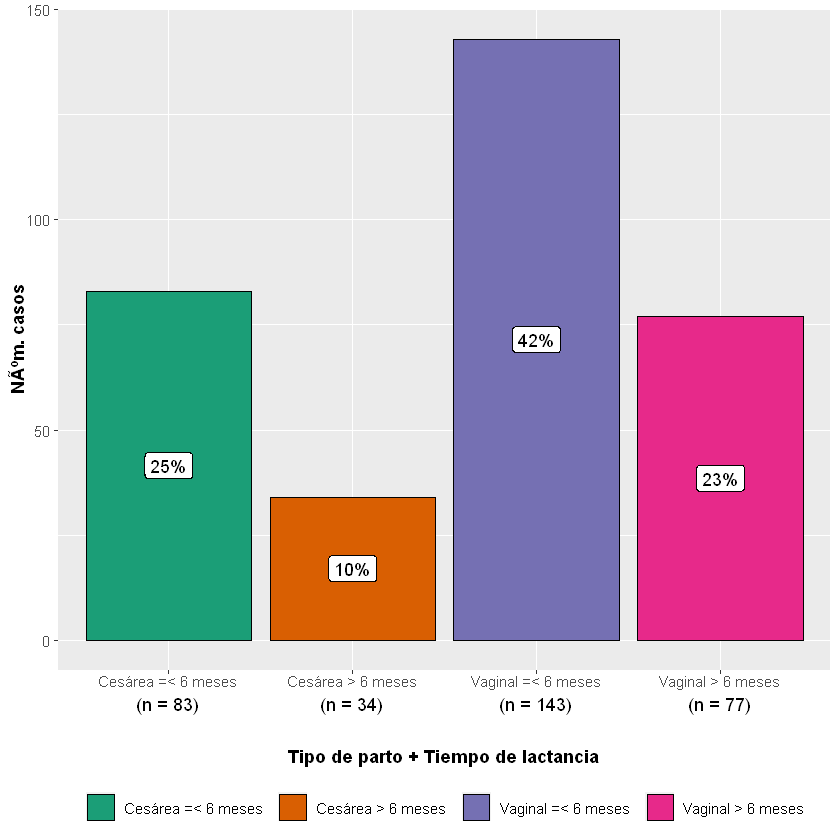

In [21]:
df <- df %>% 
    mutate(
        parto_lactancia = fct_recode(
            parto_lactancia,
            "Vaginal > 6 meses" = "Vaginal - Más de 6 meses",
            "Vaginal =< 6 meses" = "Vaginal - 6 meses o menos",
            "Cesárea > 6 meses" = "Cesárea - Más de 6 meses",
            "Cesárea =< 6 meses" = "Cesárea - 6 meses o menos",
        )
    )

df %>% plot_bar(parto_lactancia, "Tipo de parto + Tiempo de lactancia")

#### Tipo de parto + tiempo de lactancia y enfermedades autoinmunes

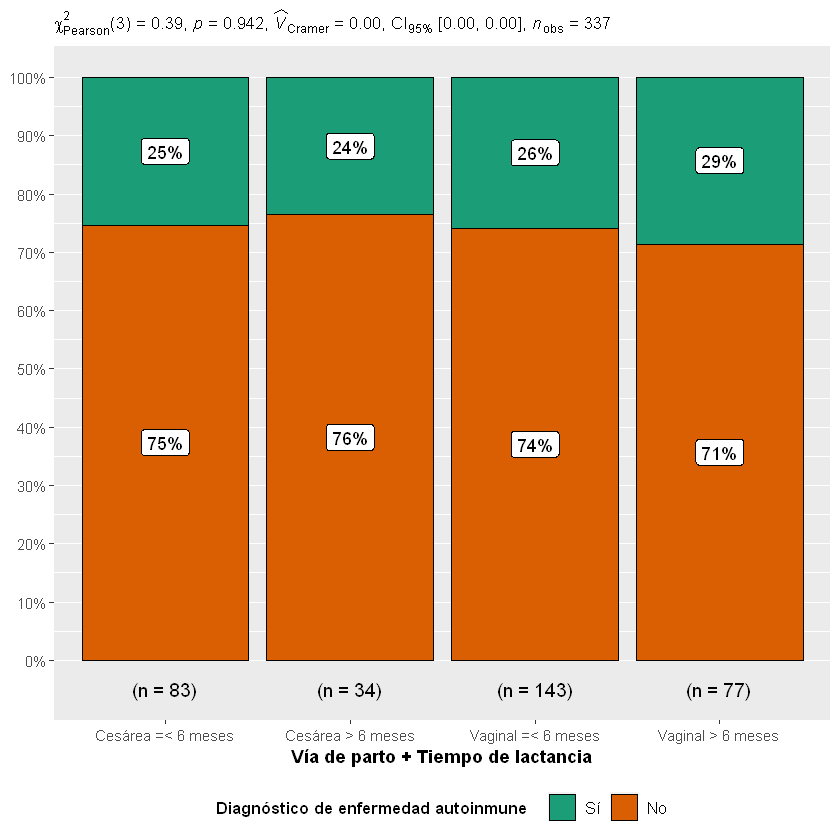

In [22]:
df %>%
plot_barstats(
    x = parto_lactancia, y = dx_enf_autoinm,
    xlab = "Vía de parto + Tiempo de lactancia", legend = "Diagnóstico de enfermedad autoinmune"
)

#### Tipo de parto + tiempo de lactancia y patología tiroidea

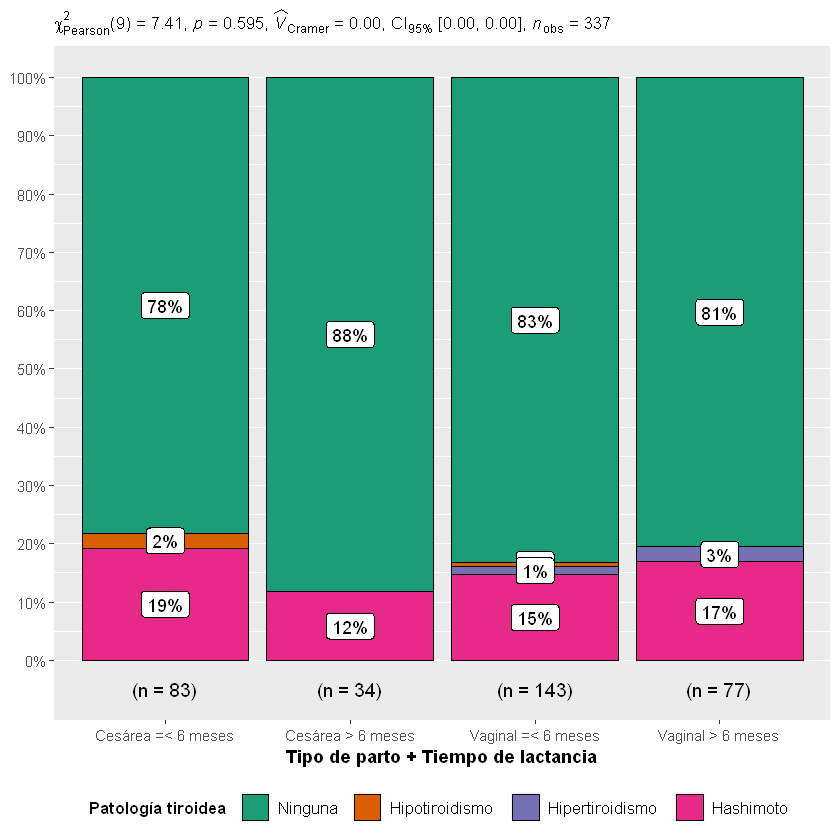

In [23]:
df %>%
plot_barstats(
    x = parto_lactancia, y = hipot,
    xlab = "Tipo de parto + Tiempo de lactancia", legend = "Patología tiroidea"
)

#### Tipo de parto + tiempo de lactancia y enfermedad celíaca

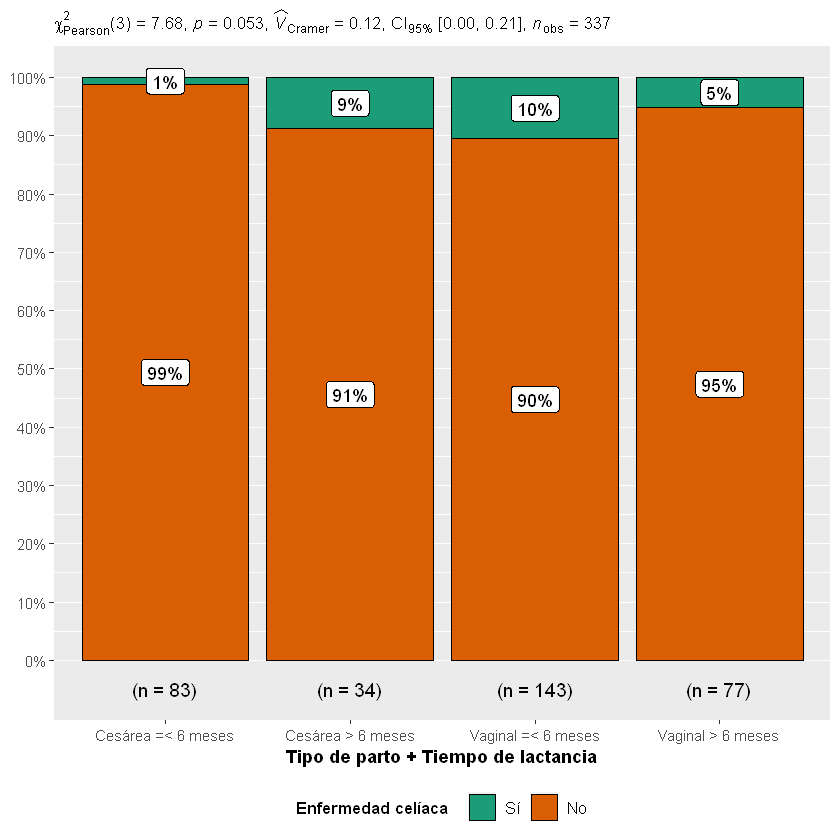

In [24]:
df %>%
plot_barstats(
    x = parto_lactancia, y = celiaquia,
    xlab = "Tipo de parto + Tiempo de lactancia", legend = "Enfermedad celíaca"
)

#### Tipo de parto + tiempo de lactancia y artritis reumatoide

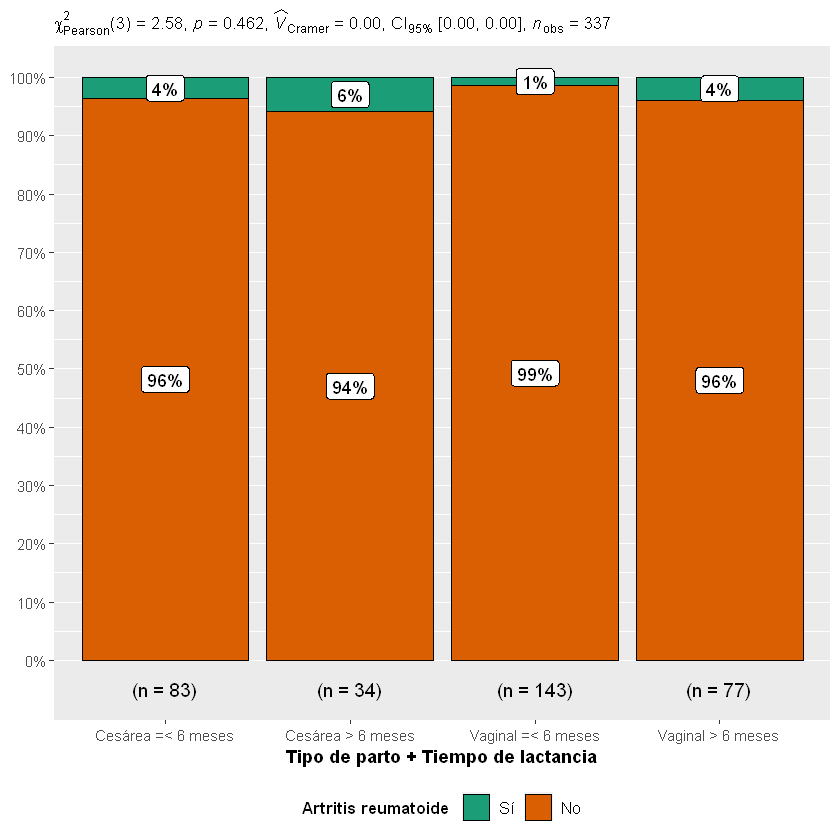

In [25]:
df %>%
plot_barstats(
    x = parto_lactancia, y = artritis,
    xlab = "Tipo de parto + Tiempo de lactancia", legend = "Artritis reumatoide"
)

### Adicional: Otras patologías asociadas

#### Rinitis alérgica

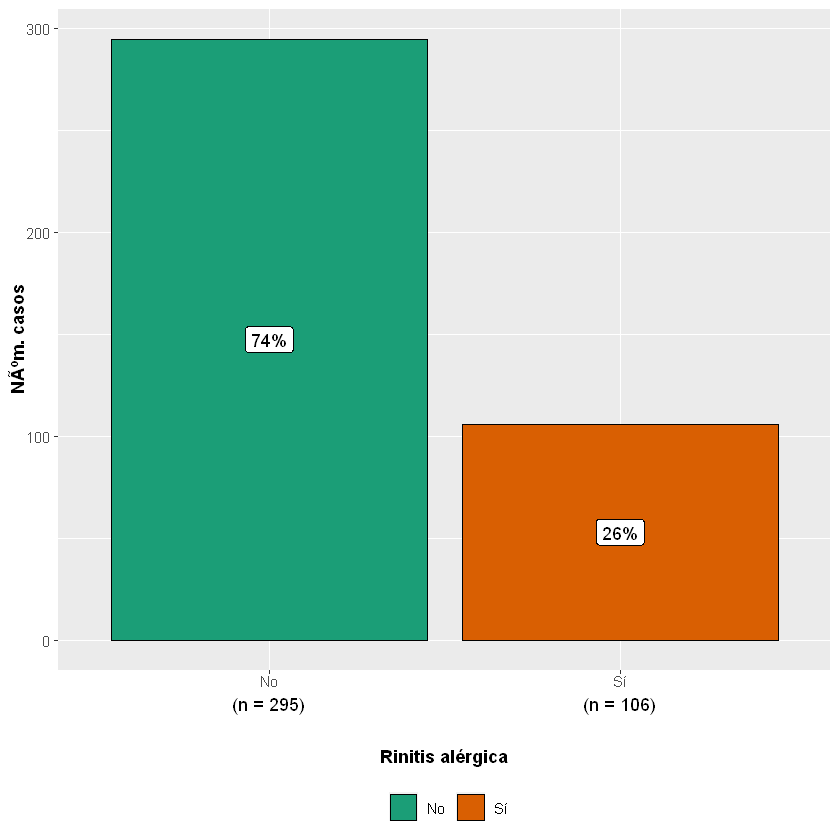

In [26]:
df %>% plot_bar(rinitis_alergica, "Rinitis alérgica")

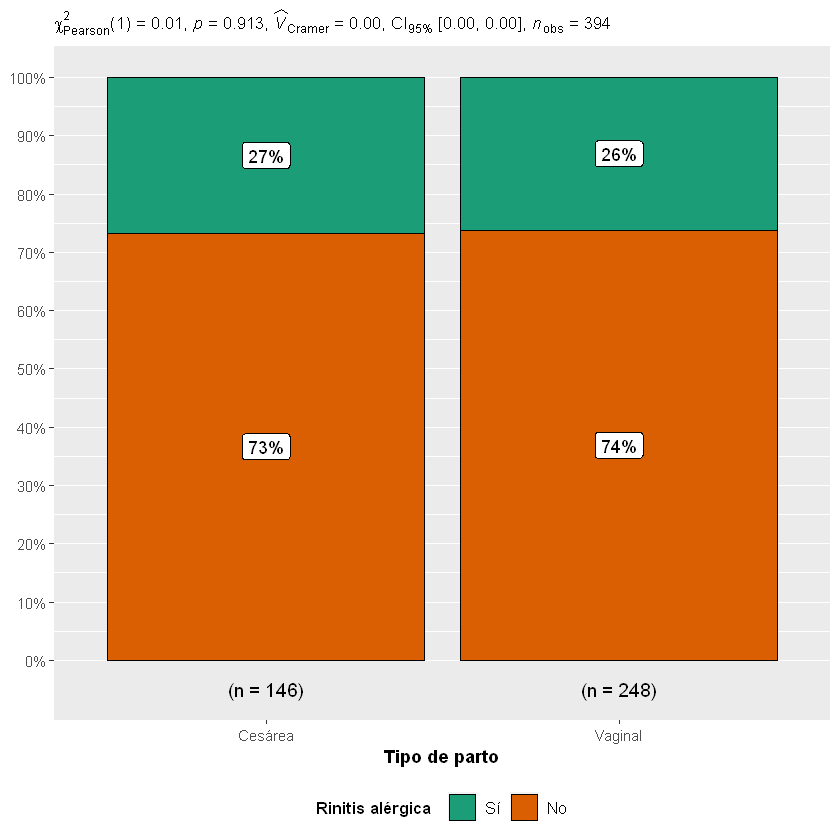

In [27]:
df %>%
plot_barstats(
    x = via_de_nacimiento, y = rinitis_alergica,
    xlab = "Tipo de parto", legend = "Rinitis alérgica"
)

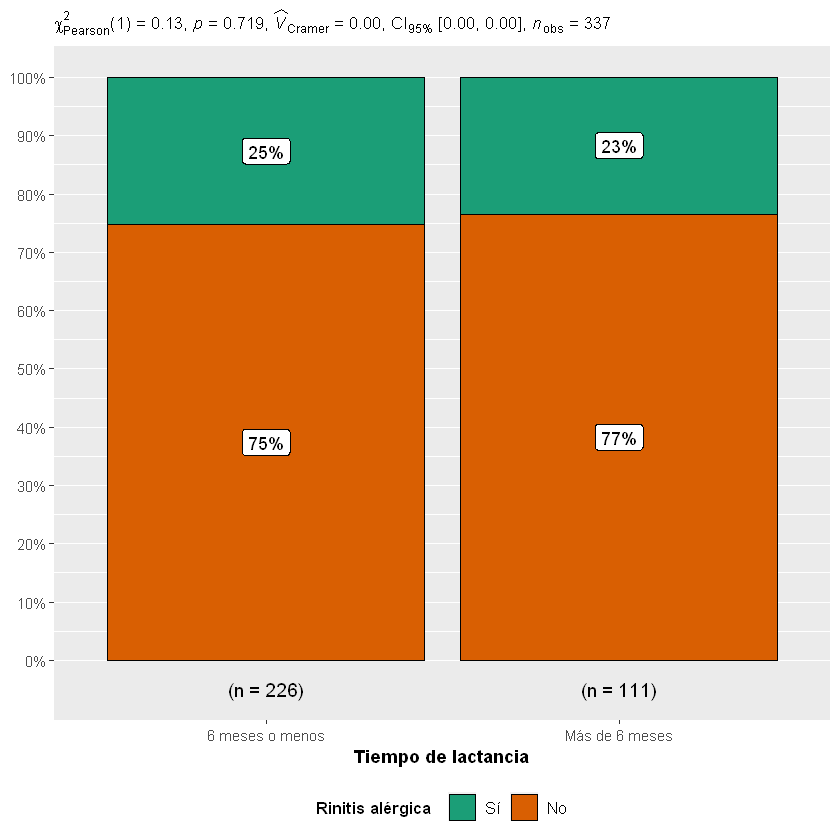

In [28]:
df %>%
plot_barstats(
    x = tiempo_de_lactancia, y = rinitis_alergica,
    xlab = "Tiempo de lactancia", legend = "Rinitis alérgica"
)

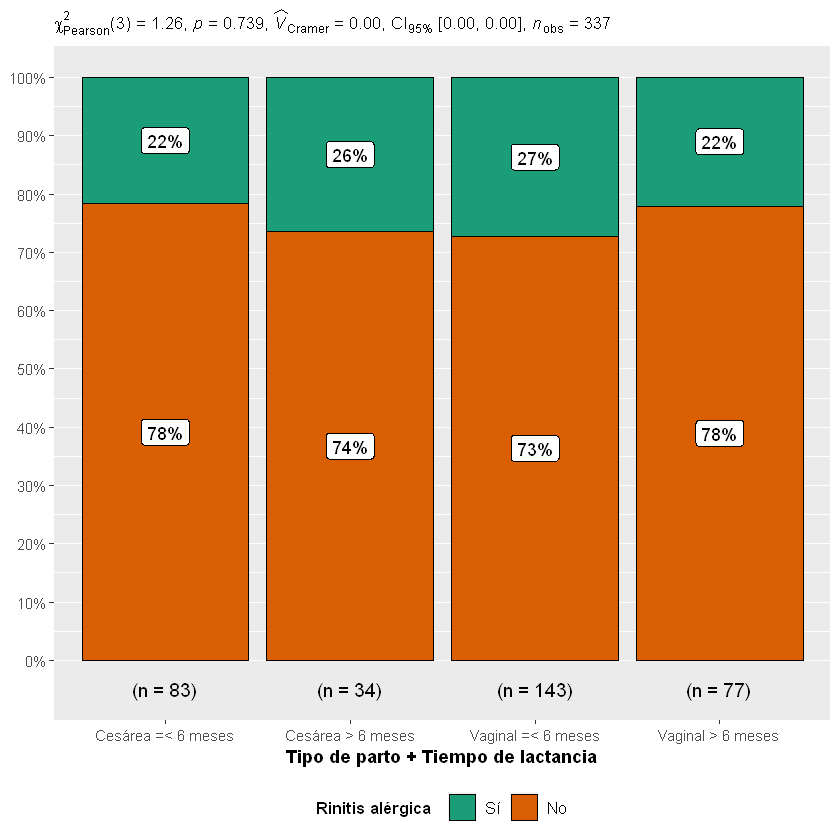

In [29]:
df %>%
plot_barstats(
    x = parto_lactancia, y = rinitis_alergica,
    xlab = "Tipo de parto + Tiempo de lactancia", legend = "Rinitis alérgica"
)

#### Síndrome del intestino irritable

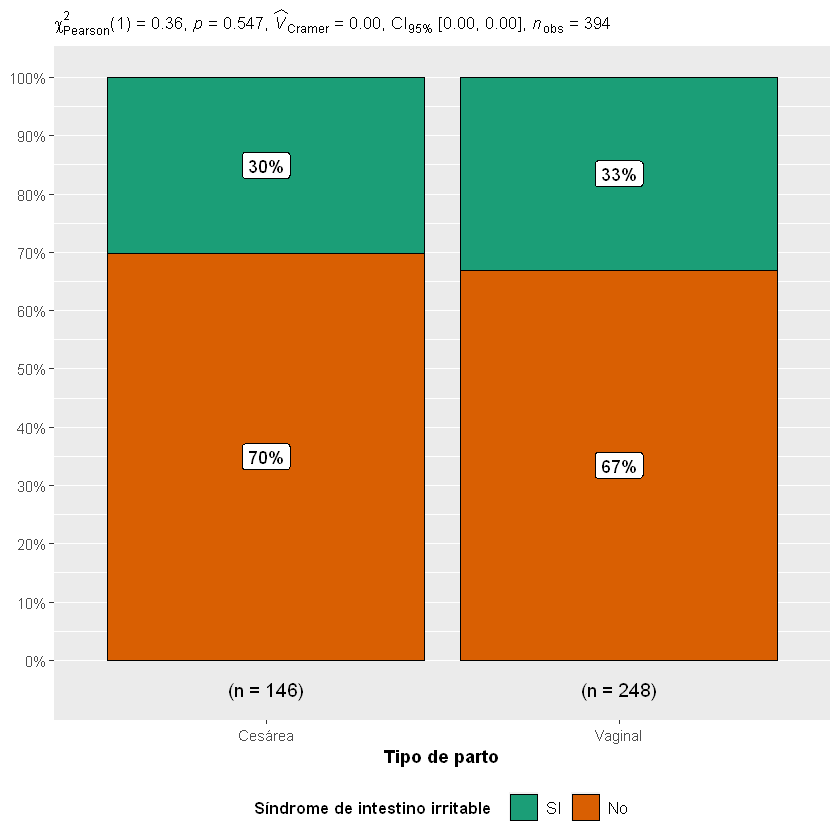

In [30]:
df %>%
plot_barstats(
    x = via_de_nacimiento, y = sii,
    xlab = "Tipo de parto", legend = "Síndrome de intestino irritable"
)

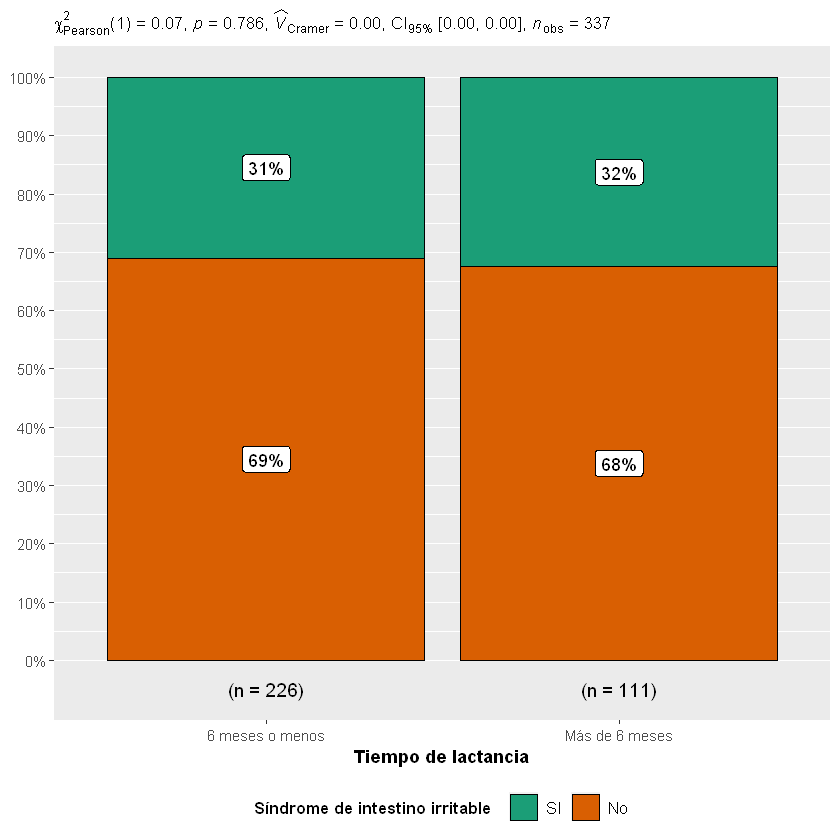

In [31]:
df %>%
plot_barstats(
    x = tiempo_de_lactancia, y = sii,
    xlab = "Tiempo de lactancia", legend = "Síndrome de intestino irritable"
)

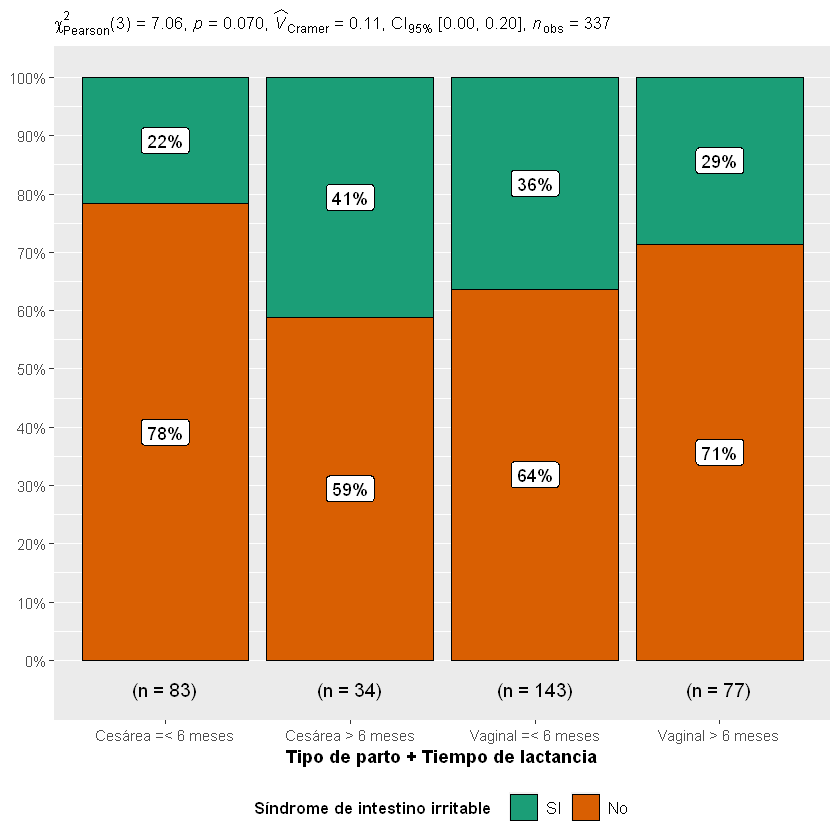

In [32]:
df %>%
plot_barstats(
    x = parto_lactancia, y = sii,
    xlab = "Tipo de parto + Tiempo de lactancia", legend = "Síndrome de intestino irritable"
)

#### Síndrome del ovario poliquístico

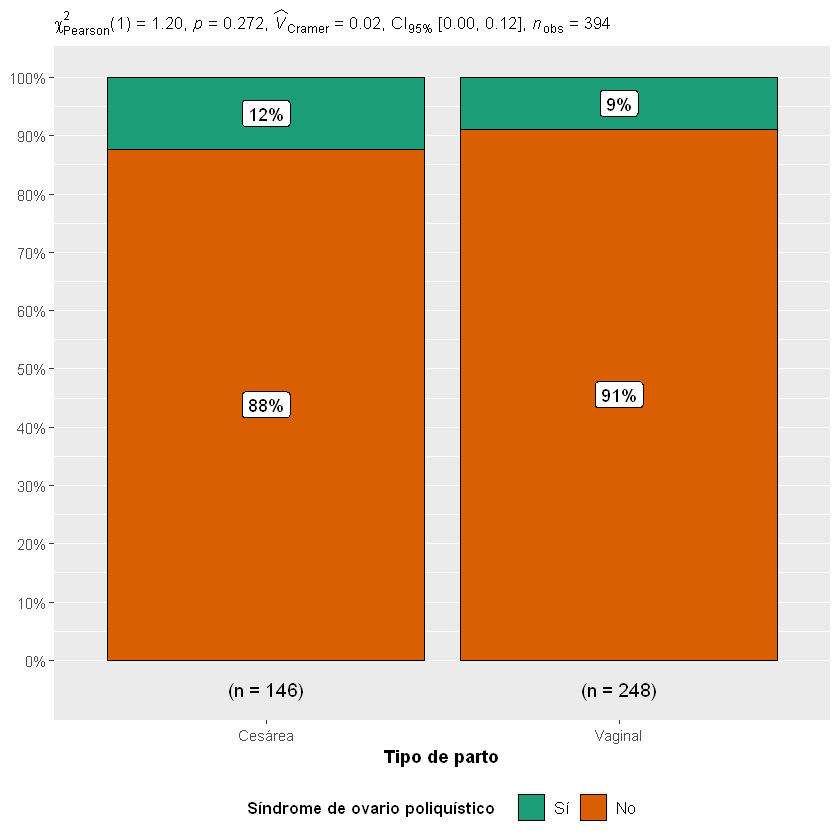

In [33]:
df %>%
plot_barstats(
    x = via_de_nacimiento, y = sop,
    xlab = "Tipo de parto", legend = "Síndrome de ovario poliquístico"
)

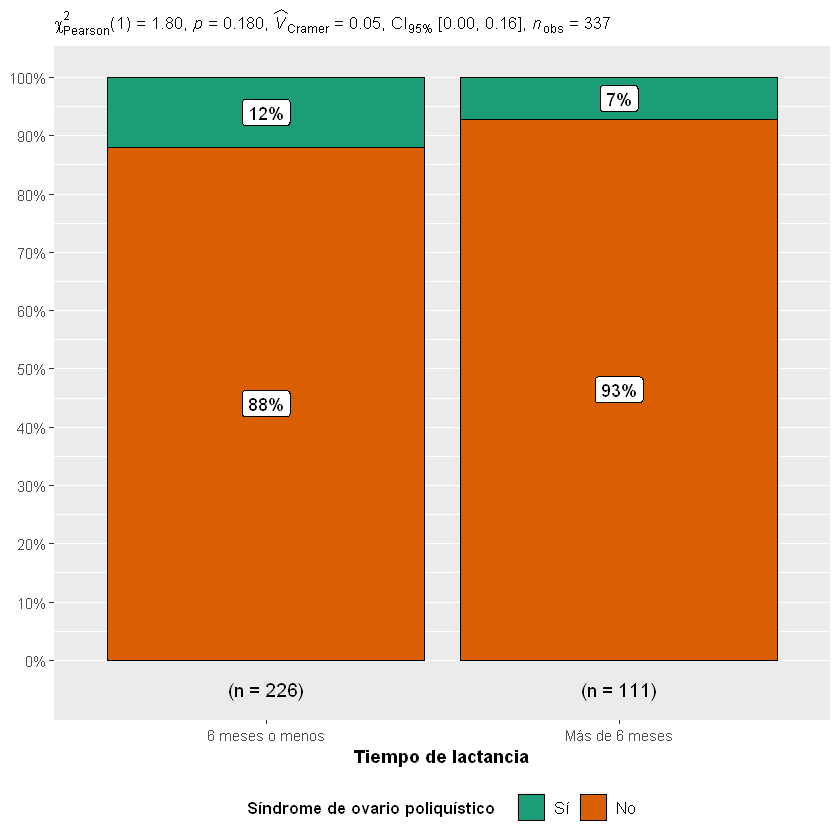

In [34]:
df %>%
plot_barstats(
    x = tiempo_de_lactancia, y = sop,
    xlab = "Tiempo de lactancia", legend = "Síndrome de ovario poliquístico"
)

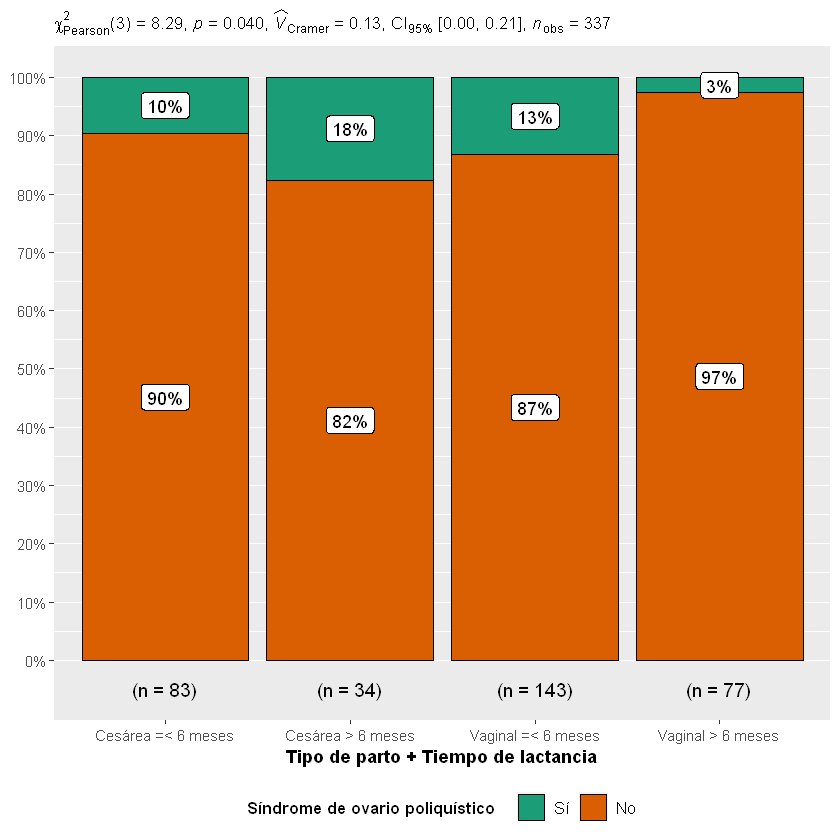

In [35]:
df %>%
plot_barstats(
    x = parto_lactancia, y = sop,
    xlab = "Tipo de parto + Tiempo de lactancia", legend = "Síndrome de ovario poliquístico"
)